In [ ]:
#import libraries
import numpy as np
import pandas as pd
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sb 
%matplotlib inline
plt.show()

In [ ]:
#uploading the files from local storage to cloud
print("Upload your dataset\n")
uploaded = files.upload()

Upload your dataset



Saving Cleaned_Australian_EV_Charging_Stations.csv to Cleaned_Australian_EV_Charging_Stations.csv


In [ ]:
#loading the dataset
df = pd.read_csv("Cleaned_Australian_EV_Charging_Stations.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  391 non-null    int64  
 1   Location Name               391 non-null    object 
 2   Latitude                    391 non-null    float64
 3   Longitude                   391 non-null    float64
 4   Town                        391 non-null    object 
 5   Postal Code                 391 non-null    object 
 6   City                        391 non-null    object 
 7   Address                     391 non-null    object 
 8   Plugs_Type2                 361 non-null    float64
 9   Plugs_Three_Phase           318 non-null    float64
 10  Plugs_CHAdeMO               373 non-null    float64
 11  Plugs_CCS/SAE               374 non-null    float64
 12  Plugs_Tesla                 351 non-null    float64
 13  Plugs_J-1772                318 non

In [ ]:
#dropping all the columns with high number of missing values
to_drop = ['Supermarkets','Malls','Restaurants','Parks','Hospitals','Power 1','Plugs_wall_AU/NZ','Plugs_Caravan_Mains_Socket',
           'Plugs_J-1772','Plugs_Tesla','Unnamed: 0','Plugs_CCS/SAE','Plugs_CHAdeMO','Plugs_Three_Phase','Plugs_Type2']

df.drop(to_drop, inplace=True, axis=1)

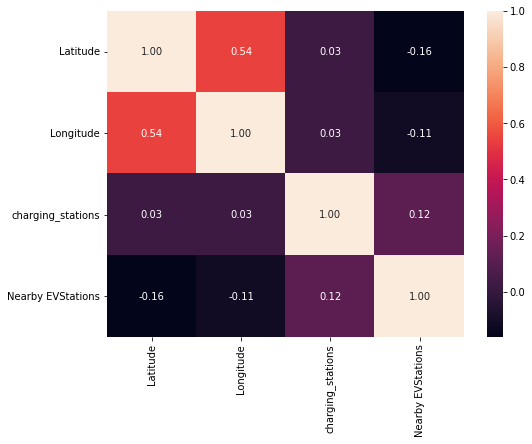

In [ ]:
plt.figure(figsize=(8,6))
sb.heatmap(df.corr(), annot = True, fmt = ".2f" ,cmap = "rocket")

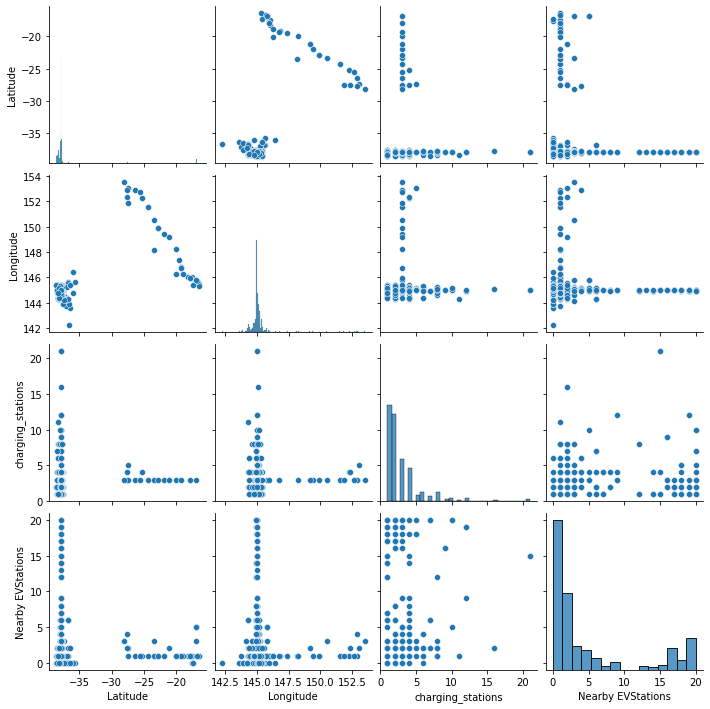

In [ ]:
sb.pairplot(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location Name      391 non-null    object 
 1   Latitude           391 non-null    float64
 2   Longitude          391 non-null    float64
 3   Town               391 non-null    object 
 4   Postal Code        391 non-null    object 
 5   City               391 non-null    object 
 6   Address            391 non-null    object 
 7   charging_stations  317 non-null    float64
 8   Nearby EVStations  391 non-null    int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 27.6+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


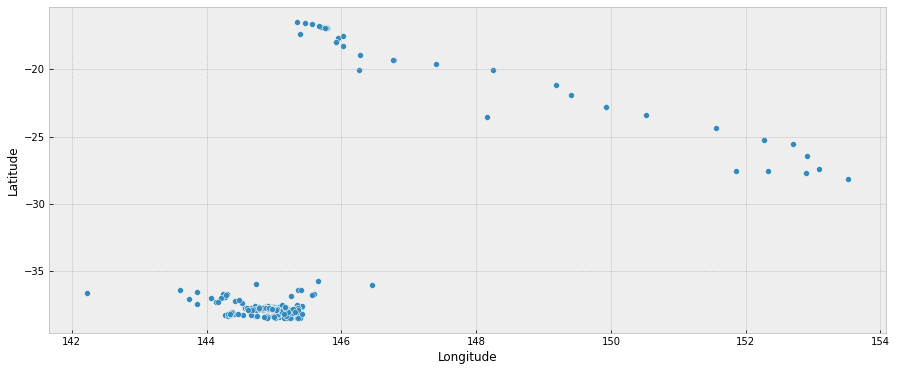

In [ ]:
plt.style.use("bmh")
plt.figure(figsize=(15,6))
sb.scatterplot(df.Longitude, df.Latitude)

In [ ]:
for col in df.columns:
  print(col," : ",df[col].nunique())

Location Name  :  315
Latitude  :  391
Longitude  :  390
Town  :  53
Postal Code  :  173
City  :  14
Address  :  319
charging_stations  :  14
Nearby EVStations  :  19


In [ ]:
def colCategorization(limit):
  num_cols = [col for col in df.columns if df[col].dtype != "O" and col != "time" and df[col].nunique() > limit] 
  cat_cols = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() <= limit]     
  num_but_cat = [col for col in df.columns if df[col].dtype != "O" and df[col].nunique() <= limit] 
  cat_but_num = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() > limit] 
  cat_cols = cat_cols + num_but_cat 
  return num_cols, cat_cols, cat_but_num 
num_cols, cat_cols, cat_but_num = colCategorization(15)
print("Numeric Columns: {}\nCategoric Columns: {}\nCategoric but Numeric Columns: {}".format(num_cols, cat_cols, cat_but_num))

Numeric Columns: ['Latitude', 'Longitude', 'Nearby EVStations']
Categoric Columns: ['City', 'charging_stations']
Categoric but Numeric Columns: ['Location Name', 'Town', 'Postal Code', 'Address']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


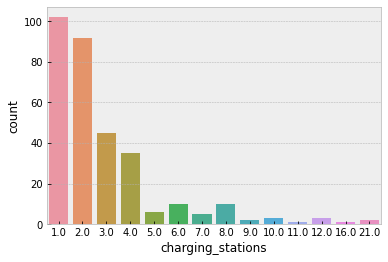

In [ ]:
sb.countplot(df["charging_stations"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


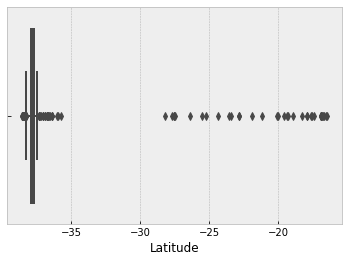

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Latitude : 98


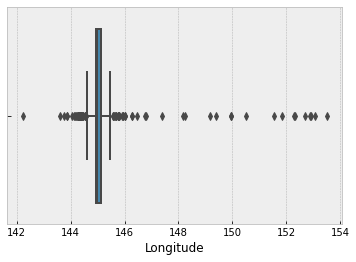


Longitude : 75


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


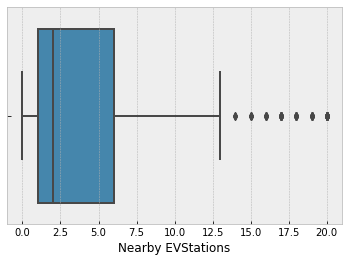


Nearby EVStations : 75


In [ ]:
def outlierLimit(df,col,q1, q3):
  q1 = df[col].quantile(q1)
  q3 = df[col].quantile(q3)
  iqr = q3 - q1
  lowerLimit = q1 - iqr * 1.5
  upperLimit = q3 + iqr * 1.5
  return lowerLimit, upperLimit
def outlierControl(df, col, q1, q3):
  lowerLimit, upperLimit = outlierLimit(df, col, q1, q3)
  outlierDf = df.loc[(df[col] < lowerLimit) | (df[col] > upperLimit)]
  if outlierDf.any(axis = None):
    sb.boxplot(df[col])
    plt.show()
    return "\n" + col+" : "+str(len(outlierDf))
  else: 
    return "\n" + col +" : "+ str(False) 

for col in num_cols:
  print(outlierControl(df,col,q1=0.25, q3 = 0.75))

In [ ]:
len(df)

391

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


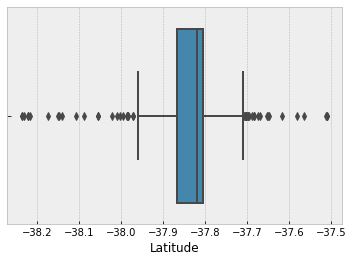


Latitude : 49


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


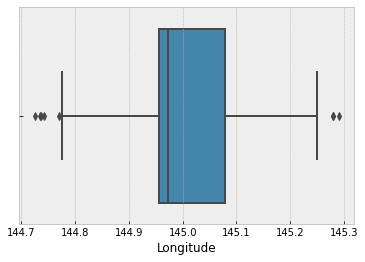


Longitude : 8

Nearby EVStations : False


In [ ]:
def outlierValues(df, col, q1, q3):
  lowerLimit, upperLimit = outlierLimit(df, col, q1, q3)
  df = df.loc[(df[col] > lowerLimit) & (df[col] < upperLimit)]

for col in num_cols:
  lowerLimit, upperLimit = outlierLimit(df, col, q1 = 0.25, q3 = 0.75)
  df = df.loc[(df[col] > lowerLimit) & (df[col] < upperLimit)]
for col in num_cols:
  print(outlierControl(df,col,q1=0.25, q3 = 0.75))

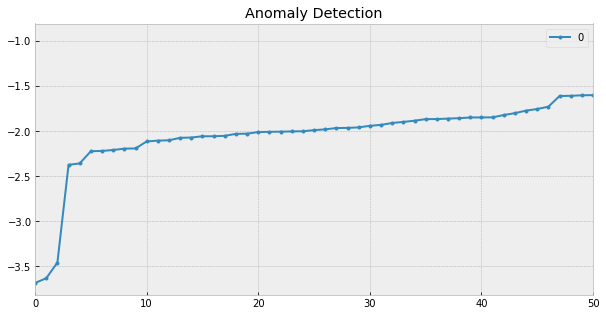

Result: [-3.68359139 -3.63190666 -3.45808919 -2.37554332 -2.36009878 -2.2249073
 -2.22174151 -2.21146835 -2.19646674 -2.1942859  -2.11685362 -2.10768751
 -2.10382629 -2.0765658  -2.07358651 -2.05958216 -2.05939445 -2.0545144
 -2.03286195 -2.03077868 -2.01272037 -2.01070507 -2.00923199 -2.00598309
 -2.00381532 -1.99153162 -1.98285413 -1.968286   -1.96676279 -1.96096511
 -1.94353547 -1.93347806 -1.91224805 -1.90071819 -1.88694525 -1.86963795
 -1.86876171 -1.86439969 -1.85922042 -1.85141116 -1.85107041 -1.85005924
 -1.82424436 -1.80372097 -1.77499541 -1.75781442 -1.73163549 -1.61341266
 -1.61167149 -1.60585458]
DataFrame Scores: [-1.36488783 -1.02200418 -1.96676279 -1.02240364 -1.18708797 -1.31070376
 -1.75781442 -2.0545144  -1.86963795 -0.95582172 -0.97138796 -1.26846949
 -1.21004685 -1.06683747 -2.00598309 -1.05066173 -1.22493684 -1.08564043
 -1.22468799 -0.95660972 -1.12868838 -1.42779648 -1.33075937 -1.03227295
 -1.08698336 -1.07683706 -1.15366473 -2.21146835 -1.32810446 -1.85922042
 

In [ ]:
# Unsupervised Outlier Detection
from sklearn.neighbors import LocalOutlierFactor
dropCols = cat_cols + cat_but_num + ["Nearby EVStations"]
def localOutlierFactor(df, neighbors = None, percent = None, plot_xlim = None): # Unsupervised Algorithm
    # 1: Not Outlier, -1: Outlier    
    lof = LocalOutlierFactor(n_neighbors = neighbors, contamination=percent)
    lof.fit_predict(df.drop(dropCols, axis = 1))
    df_scores = lof.negative_outlier_factor_
    plt.style.use("bmh")
    pd.DataFrame(np.sort(df_scores)).plot(stacked = True, xlim = [0,plot_xlim], style = ".-", figsize = (10,5), title = "Anomaly Detection")
    plt.show()
    result = np.sort(df_scores)[0:plot_xlim]
    return result,df_scores
result,df_scores = localOutlierFactor(df, neighbors=20, percent = 0.1, plot_xlim = 50)
print("Result: {}\nDataFrame Scores: {}\n".format(result, df_scores))

on all data rate:  0.9881422924901185


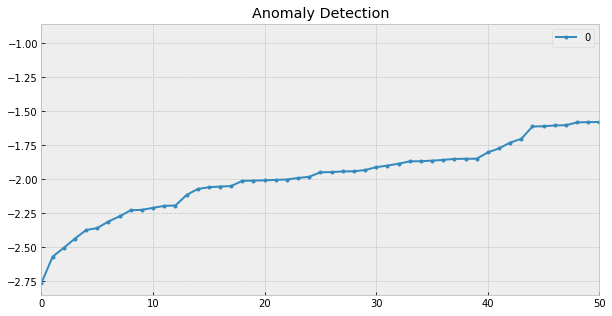

Result: [-2.76285386 -2.57034783 -2.50489874 -2.43706158 -2.37472298 -2.35928366
 -2.31170403 -2.27343349 -2.22901496 -2.22585593 -2.21075271 -2.19646674
 -2.1942859  -2.11685362 -2.07291481 -2.05958216 -2.0545144  -2.05106248
 -2.01272037 -2.01070507 -2.00923199 -2.00537289 -2.00320575 -1.99153162
 -1.98285413 -1.94988689 -1.94837757 -1.94353547 -1.94263274 -1.93347806
 -1.91224805 -1.90071819 -1.88694525 -1.86963795 -1.86876171 -1.86439969
 -1.85894765 -1.85141116 -1.85107041 -1.85005924 -1.80372097 -1.77457507
 -1.73163549 -1.70405571 -1.61341266 -1.61167149 -1.60585458 -1.60389172
 -1.58342804 -1.5812371 ]



In [ ]:
print("on all data rate: ",df.drop(df[df_scores < -3.43172534].index, axis = 0).reset_index(drop=True).shape[0]/len(df))
df = df.drop(df[df_scores < -3.43172534].index, axis = 0).reset_index(drop = True)
result,df_scores = localOutlierFactor(df, neighbors=20, percent = 0.1, plot_xlim = 50)
print("Result: {}\n".format(result))

In [ ]:
len(df)

250

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/

<Figure size 432x288 with 0 Axes>

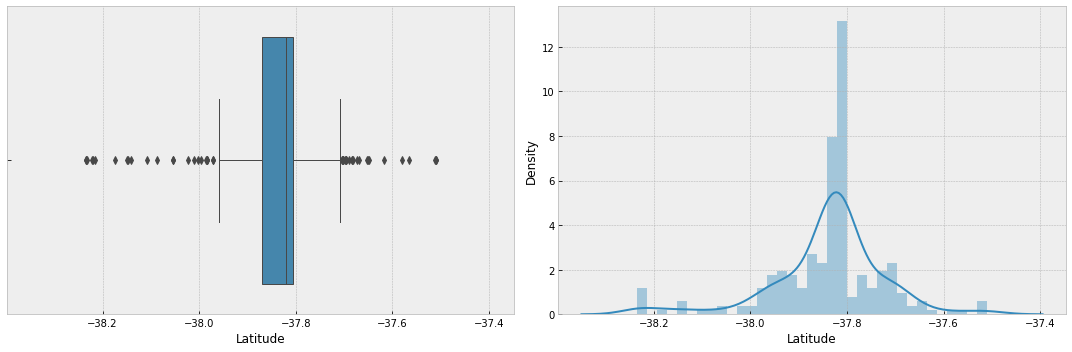

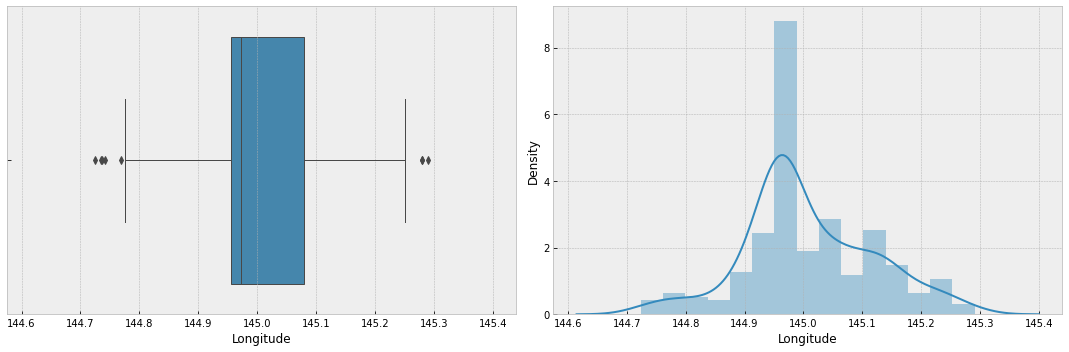

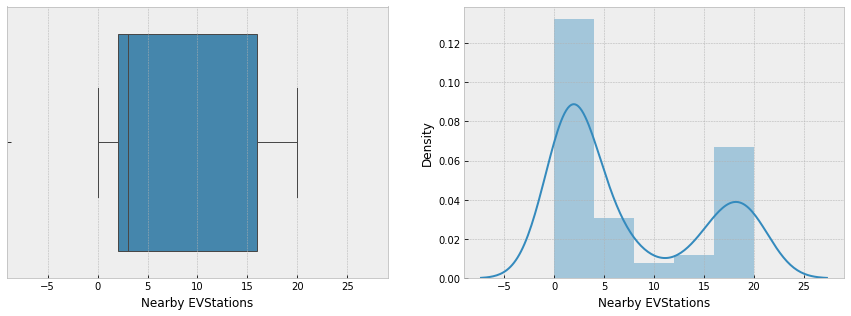

In [ ]:
for col in num_cols:
    plt.tight_layout()
    fig, (ax_box, ax_hist) = plt.subplots(1,2, sharex = True, figsize = (15,5))
    sb.boxplot(df[col], ax = ax_box, linewidth = 1)
    sb.distplot(df[col], ax = ax_hist)

In [ ]:
dfCopy = df.copy()
dfCopy.head()

,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,charging_stations,Nearby EVStations
0,Secure Parking,-37.832108,144.969126,N.A,3205,Melbourne,"15-29 Bank Street, South Melbourne VIC 3205, A...",21.0,15
1,Lonsdale St,-37.813437,144.955934,N.A,3000,Melbourne,"535 Little Lonsdale St, Melbourne VIC 3004, Au...",2.0,20
2,CTR Whittlesea,-37.510590,145.118412,N.A,3757,Melbourne,"74A Church St, Whittlesea VIC 3757, Australia",4.0,1
3,Wanzl / Rectifier Technologies,-37.854020,145.104433,N.A,3125,Melbourne,"97 Highbury Rd, Burwood VIC 3125, Australia",1.0,2
4,Melbourne Museum,-37.804609,144.972702,N.A,N.A,Melbourne,"11 Nicholson St, Carlton VIC 3053, Australia",2.0,17


In [ ]:
df = df.drop("Address", axis = 1)
df.head()

,Location Name,Latitude,Longitude,Town,Postal Code,City,charging_stations,Nearby EVStations
0,Secure Parking,-37.832108,144.969126,N.A,3205,Melbourne,21.0,15
1,Lonsdale St,-37.813437,144.955934,N.A,3000,Melbourne,2.0,20
2,CTR Whittlesea,-37.510590,145.118412,N.A,3757,Melbourne,4.0,1
3,Wanzl / Rectifier Technologies,-37.854020,145.104433,N.A,3125,Melbourne,1.0,2
4,Melbourne Museum,-37.804609,144.972702,N.A,N.A,Melbourne,2.0,17


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
le = LabelEncoder()
df["City"] = le.fit_transform(df["City"])
df["Location Name"] = le.fit_transform(df["Location Name"])
df.head()

,Location Name,Latitude,Longitude,Town,Postal Code,City,charging_stations,Nearby EVStations
0,150,-37.832108,144.969126,N.A,3205,0,21.0,15
1,98,-37.813437,144.955934,N.A,3000,0,2.0,20
2,26,-37.510590,145.118412,N.A,3757,0,4.0,1
3,180,-37.854020,145.104433,N.A,3125,0,1.0,2
4,106,-37.804609,144.972702,N.A,N.A,0,2.0,17


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(["Latitude","Longitude"], axis = 1).values 
y = df[["Latitude","Longitude"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 92)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("X_train.shape: {}\nX_test.shape: {}\ny_train.shape: {}\ny_test.shape: {}\n".format(X_train.shape,
                                                                                            X_test.shape,
                                                                                            y_train.shape,
                                                                                            y_test.shape))

ValueError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
from sklearn.model_selection import cross_val_predict

rmse_val, scoresList, neighbors = [], [], [] #to store rmse values for different k
for K in range(20):
    K = K+1
    neighbors.append(K)
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    scores = cross_val_predict(model, X_train, y_train, cv = 10)
    scoresList.append(scores.mean())
    error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error, " Train Accuracy: ",model.score(X_train, y_train)," Test Accuracy: ",model.score(X_test,y_test))

mse = [1-x for x in scoresList]
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of K-Neighbors = %d" %optimal_k) 

plt.figure(figsize=(10,6))
plt.plot(neighbors, mse)
plt.xlabel("Number of K-Neighbors")
plt.ylabel("Error")
plt.show()

ValueError: ignored

In [ ]:
def modelVisualization(y_test, y_pred, model, modelName):
  plt.figure(figsize = (12,6))
  s = 50
  a = 0.3
  plt.scatter(
      y_test[:, 0],
      y_test[:, 1],
      color = "red",
      s=s,
      alpha=a,
      label="Real"
  )
  plt.scatter(
      y_pred[:, 0],
      y_pred[:, 1],
      color = "blue",
      s=s,
      alpha=a,
      label="Predict"
  )
  plt.xlabel("Latitude")
  plt.ylabel("Longitude")
  plt.title("Multi {} Score={}".format(modelName, round(model.score(X_test, y_test),2)))
  plt.legend()
  plt.show()


knn = KNeighborsRegressor(n_neighbors = 17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
modelVisualization(y_test, y_pred, knn, "KNN")
realDf = pd.DataFrame(y_test, columns = ["Real_Lat","Real_Lon"])
predDf = pd.DataFrame(y_pred, columns = ["Pred_Lat","Pred_Lon"]) 
resultDf = pd.concat([realDf,predDf], axis = 1)
print("\n",resultDf.head())
print("\nMSE: {}\nMAE: {}\nRMSE: {}\nR2 Score: {}\nModel Train Accuracy: {}\nModel Test Accuracy: {}".format(mean_squared_error(y_test, y_pred),
                                                                                                   mean_absolute_error(y_test, y_pred),
                                                                                                   np.sqrt(mean_absolute_error(y_test, y_pred)),
                                                                                                   r2_score(y_test, y_pred),
                                                                                                   knn.score(X_train, y_train),
                                                                                                   knn.score(X_test, y_test)))


ValueError: ignored

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

pca = PCA()
KNN = KNeighborsRegressor()
pipeline = Pipeline(steps=[("pca", pca),
                       ("KNN", KNN)])
parameters = dict(pca__n_components=list(range(1,X_train.shape[1]+1,1)),
                  KNN__n_neighbors=[2, 3, 5, 10],
                  KNN__algorithm=["auto",  "ball_tree", "kd_tree", "brute"])
clf = GridSearchCV(pipeline, parameters)
clf.fit(X_train, y_train)
print("Best Number Of Components:", clf.best_estimator_.get_params()["pca__n_components"])
print(clf.best_estimator_.get_params()["KNN"])

CV_Result = cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1, scoring="r2")
print("Cv Result Mean: {}\nCv Result Std: {}\nTrain Accuracy: {}\nTest Accuracy: {}".format(CV_Result.mean(), CV_Result.std(), clf.score(X_train, y_train),
                                                                                            clf.score(X_test, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-packa

ValueError: ignored

In [ ]:
def modelKNN():
  knn = KNeighborsRegressor(n_neighbors = 2, algorithm = "brute")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test) 
  realDf = pd.DataFrame(y_test, columns = ["Real_Lat","Real_Lon"])
  predDf = pd.DataFrame(y_pred, columns = ["Pred_Lat", "Pred_Lon"])
  resultDf = pd.concat([realDf,predDf], axis = 1)
  print(resultDf.head())
  scores = cross_val_predict(knn,X_train, y_train, cv = 10)
  print("\nMSE: {}\nMAE: {}\nRMSE: {}\nCV Mean: {}\nCV STD: {}\nR2 Score: {}\nTrain Accuracy: {}\nTest Accuracy: {}\n".format(mean_squared_error(y_test, y_pred),
                                                                                                                              mean_absolute_error(y_test, y_pred),
                                                                                                                              np.sqrt(mean_squared_error(y_test, y_pred)),
                                                                                                                              scores.mean(), 
                                                                                                                              scores.std(),
                                                                                                                              r2_score(y_test, y_pred),
                                                                                                                              knn.score(X_train, y_train),
                                                                                                                              knn.score(X_test, y_test)))
  modelVisualization(y_test, y_pred, knn, "KNN")

modelKNN()

ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def modelRandomForestGridSearchCV():
  rfr = RandomForestRegressor()
  parameters = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False]
            }
  gridSearchCV = GridSearchCV(rfr, param_grid = parameters)
  gridSearchCV.fit(X_train, y_train)
  bestParams = gridSearchCV.best_params_
  bestResult = gridSearchCV.best_score_
  print("Best Parameters: {}\nBest Result: {}".format(bestParams, bestResult))
modelRandomForestGridSearchCV()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.8/dist-packages/sklear

ValueError: ignored

In [ ]:
def modelRandomForest():
  rfr = RandomForestRegressor(bootstrap = False, max_features = "sqrt", min_samples_split = 4, n_estimators = 30)
  rfr.fit(X_train,y_train)
  y_pred = rfr.predict(X_test)
  scores = cross_val_score(knn,X_train, y_train, cv = 10, scoring = "r2")

  print("\nMSE: {}\nMAE: {}\nRMSE: {}\nCV Mean: {}\nCV STD: {}\nR2 Score: {}\nTrain Accuracy: {}\nTest Accuracy: {}\n".format(mean_squared_error(y_test, y_pred),
                                                                                                                              mean_absolute_error(y_test, y_pred),
                                                                                                                              np.sqrt(mean_squared_error(y_test, y_pred)),
                                                                                                                              scores.mean(),
                                                                                                                              scores.std(),
                                                                                                                              r2_score(y_test, y_pred),
                                                                                                                              rfr.score(X_train, y_train),
                                                                                                                              rfr.score(X_test, y_test)))
  modelVisualization(y_test, y_pred, rfr, "Random Forest")

modelRandomForest()


ValueError: ignored